http://localhost:8080/notebooks/git/siim-isic-melanoma-classification/working/MelEda0628A1__about_crop_dark_margins.ipynb#

In [1]:
PRFX = 'MelPrp0630C1'
PRFX_B4 = 'MelPrp0630B1'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from joblib import Parallel, delayed
import numpy as np
from pathlib import Path

import datetime
def dtnow(): return datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# copy

In [3]:
p_out = f'../output/{PRFX}'; Path(p_out).mkdir(exist_ok=True,parents=True)
p_b4 = f'../output/{PRFX_B4}'

In [4]:
ls $p_b4

andrewmvd--isic-2019/               test.csv
siim-isic-melanoma-classification/  train_all.csv


In [5]:
dftrn = pd.read_csv(f'{p_b4}/train_all.csv')
dftrn 

,source,im_pth,patient_id,target
0,20,../output/MelPrp0630B1/siim-isic-melanoma-clas...,IP_7279968,0.0
1,20,../output/MelPrp0630B1/siim-isic-melanoma-clas...,IP_3075186,0.0
2,20,../output/MelPrp0630B1/siim-isic-melanoma-clas...,IP_2842074,0.0
3,20,../output/MelPrp0630B1/siim-isic-melanoma-clas...,IP_6890425,0.0
4,20,../output/MelPrp0630B1/siim-isic-melanoma-clas...,IP_8723313,0.0
...,...,...,...,...
58452,19,../output/MelPrp0630B1/andrewmvd--isic-2019/IS...,BCN_0003925,0.0
58453,19,../output/MelPrp0630B1/andrewmvd--isic-2019/IS...,BCN_0001819,0.0
58454,19,../output/MelPrp0630B1/andrewmvd--isic-2019/IS...,BCN_0001085,1.0
58455,19,../output/MelPrp0630B1/andrewmvd--isic-2019/IS...,BCN_0002083,0.0


In [6]:
dftst = pd.read_csv(f'{p_b4}/test.csv')
dftst 

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,im_pth
0,ISIC_0052060,IP_3579794,male,70.0,NaN,../output/MelPrp0630B1/siim-isic-melanoma-clas...
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,../output/MelPrp0630B1/siim-isic-melanoma-clas...
2,ISIC_0058510,IP_7960270,female,55.0,torso,../output/MelPrp0630B1/siim-isic-melanoma-clas...
3,ISIC_0073313,IP_6375035,female,50.0,torso,../output/MelPrp0630B1/siim-isic-melanoma-clas...
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,../output/MelPrp0630B1/siim-isic-melanoma-clas...
...,...,...,...,...,...,...
10977,ISIC_9992485,IP_4152479,male,40.0,torso,../output/MelPrp0630B1/siim-isic-melanoma-clas...
10978,ISIC_9996992,IP_4890115,male,35.0,torso,../output/MelPrp0630B1/siim-isic-melanoma-clas...
10979,ISIC_9997917,IP_2852390,male,25.0,upper extremity,../output/MelPrp0630B1/siim-isic-melanoma-clas...
10980,ISIC_9998234,IP_8861963,male,65.0,lower extremity,../output/MelPrp0630B1/siim-isic-melanoma-clas...


In [7]:
dftrn['im_pth'] = dftrn.im_pth.apply(lambda x: x.replace(p_b4, p_out))

dftrn.head()

,source,im_pth,patient_id,target
0,20,../output/MelPrp0630C1/siim-isic-melanoma-clas...,IP_7279968,0.0
1,20,../output/MelPrp0630C1/siim-isic-melanoma-clas...,IP_3075186,0.0
2,20,../output/MelPrp0630C1/siim-isic-melanoma-clas...,IP_2842074,0.0
3,20,../output/MelPrp0630C1/siim-isic-melanoma-clas...,IP_6890425,0.0
4,20,../output/MelPrp0630C1/siim-isic-melanoma-clas...,IP_8723313,0.0


In [8]:
dftrn.to_csv(f'{p_out}/train_all.csv', index=False)

In [9]:
dftst['im_pth'] = dftst.im_pth.apply(lambda x: x.replace(p_b4, p_out))

dftst.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,im_pth
0,ISIC_0052060,IP_3579794,male,70.0,NaN,../output/MelPrp0630C1/siim-isic-melanoma-clas...
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,../output/MelPrp0630C1/siim-isic-melanoma-clas...
2,ISIC_0058510,IP_7960270,female,55.0,torso,../output/MelPrp0630C1/siim-isic-melanoma-clas...
3,ISIC_0073313,IP_6375035,female,50.0,torso,../output/MelPrp0630C1/siim-isic-melanoma-clas...
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,../output/MelPrp0630C1/siim-isic-melanoma-clas...


In [10]:
dftst.to_csv(f'{p_out}/test.csv', index=False)

In [11]:
ls $p_b4

andrewmvd--isic-2019/               test.csv
siim-isic-melanoma-classification/  train_all.csv


In [12]:
cp -r $p_b4/andrewmvd--isic-2019/ $p_b4/siim-isic-melanoma-classification $p_out

# crop

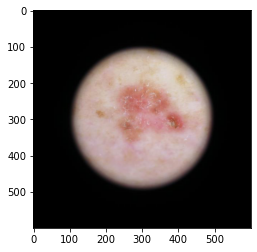

In [13]:
fnm0 = f'{p_out}/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0073022.jpg'
plt.imshow(Image.open(fnm0));

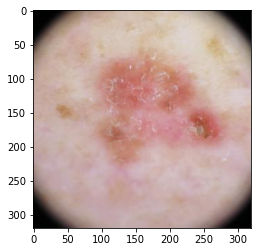

In [14]:
def crop(fnm, keep_less=0.825):
    img = cv2.imread(fnm)
    keep_less=0.80
    img_cropped = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,gray = cv2.threshold(gray,10,255,cv2.THRESH_BINARY)
    contours,hierarchy = cv2.findContours(gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if not contours: return
    cnt = max(contours, key=cv2.contourArea)
    ((x, y), r) = cv2.minEnclosingCircle(cnt)
    r = r*keep_less
    if r<100: return
    x = int(x); y = int(y); r = int(r)
    img_cropped = img_cropped[0 + (y-r)*int(r<y):-1 + (y+r+1)*int(r<y),0 + (x-r)*int(r<x):-1 + (x+r+1)*int(r<x)]
    img_cropped = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB)
    return img_cropped
img_cropped = crop(fnm0)
plt.imshow(img_cropped);

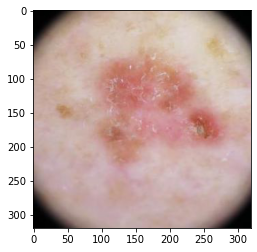

In [15]:
fnm_new = fnm0.replace(p_out, 'tmp')
Image.fromarray(img_cropped).save(fnm_new)
plt.imshow(Image.open(fnm_new));

In [16]:
def crop_and_maybe_replace(fnm):
    img_cropped = crop(fnm)
    if img_cropped is not None: 
        Image.fromarray(img_cropped).save(fnm)

## crop train

In [17]:
Parallel(n_jobs=4, verbose=10)(delayed(crop_and_maybe_replace)(fnm) for fnm in dftrn.im_pth.values)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1911s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0533s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0734s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  72 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1560s.) Setting batch_size=16.
[Parallel(n_jobs=4)]: Done 160 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 336 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 512 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 720 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 928 tasks      | ela

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

## crop test

In [18]:
Parallel(n_jobs=4, verbose=10)(delayed(crop_and_maybe_replace)(fnm) for fnm in dftst.im_pth.values)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0184s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0310s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0737s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1352s.) Setting batch_size=16.
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 456 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 632 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 840 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 1048 tasks      | el

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# inspect result

../output/MelPrp0630C1/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0069740.jpg


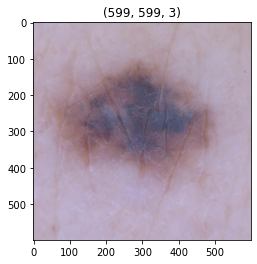

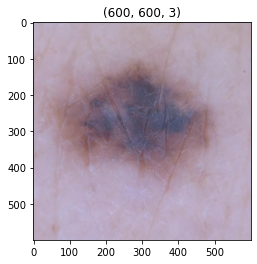

../output/MelPrp0630C1/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0029590.jpg


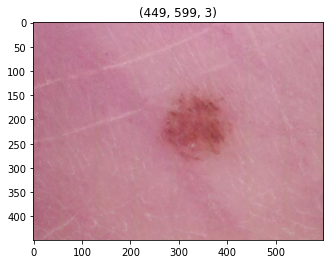

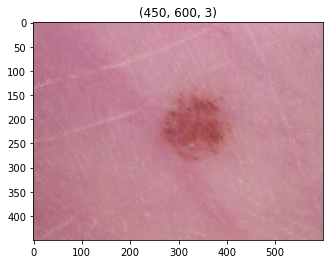

../output/MelPrp0630C1/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0030168.jpg


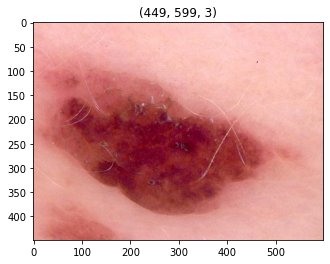

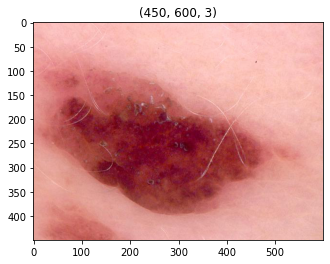

../output/MelPrp0630C1/siim-isic-melanoma-classification/jpeg/train/ISIC_1864210.jpg


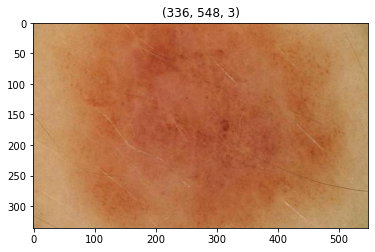

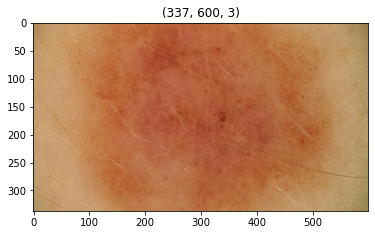

../output/MelPrp0630C1/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0010322.jpg


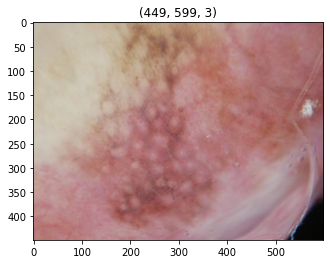

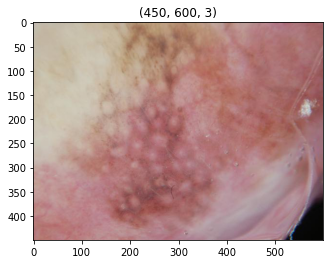

**************************************************


In [19]:
fnms = np.random.choice(dftrn.im_pth, 5, replace=False)
for fnm in fnms:
    print(fnm)
    img = plt.imread(fnm)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()

    fnm_old = fnm.replace(p_out, p_b4)
    img = plt.imread(fnm_old)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()

print('*'*50)

../output/MelPrp0630C1/siim-isic-melanoma-classification/jpeg/test/ISIC_8889579.jpg


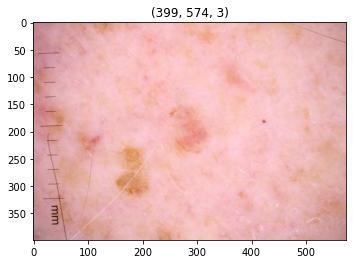

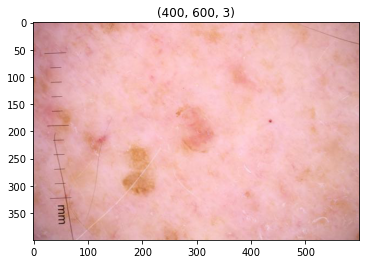

../output/MelPrp0630C1/siim-isic-melanoma-classification/jpeg/test/ISIC_8244515.jpg


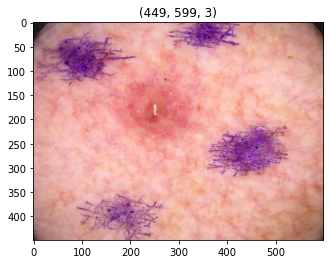

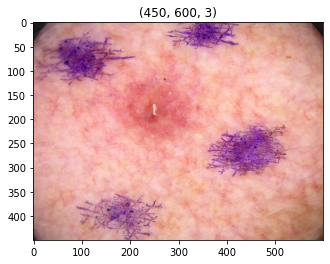

../output/MelPrp0630C1/siim-isic-melanoma-classification/jpeg/test/ISIC_6579000.jpg


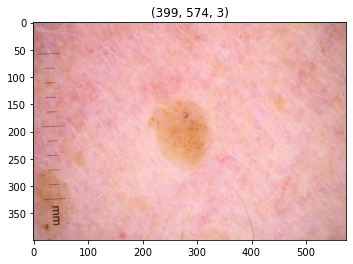

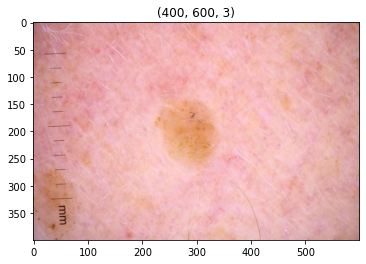

../output/MelPrp0630C1/siim-isic-melanoma-classification/jpeg/test/ISIC_3634305.jpg


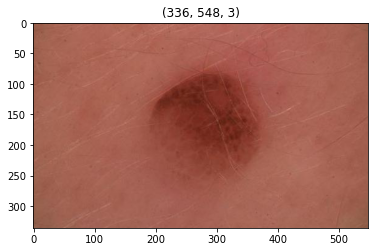

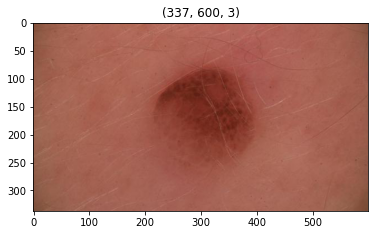

../output/MelPrp0630C1/siim-isic-melanoma-classification/jpeg/test/ISIC_7949783.jpg


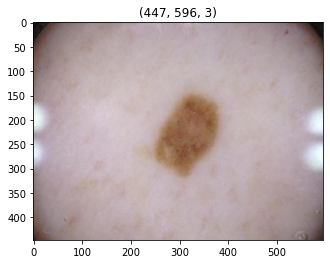

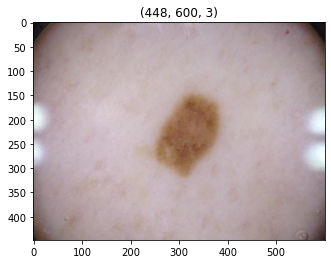

**************************************************


In [20]:
fnms = np.random.choice(dftst.im_pth, 5, replace=False)
for fnm in fnms:
    print(fnm)
    img = plt.imread(fnm)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()

    fnm_old = fnm.replace(p_out, p_b4)
    img = plt.imread(fnm_old)
    plt.title(f'{img.shape}')
    plt.imshow(img)
    plt.show()

print('*'*50)